<a href="https://colab.research.google.com/github/lordzwealth/chicago-EDA-circle-03-project/blob/emm-branch/ChicagoEDA_Circle3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# i. Importing Libraries and Loading Datasets

In [1]:
# Importing our packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Saving the file path of the data in a variable 'location'
location = r'C:\Users\Alu\Documents\Altschool Africa\Data'

# Saving the name of the file in a variable 'filename'
filename = '\crime_data_chicago.csv'

# Creating the full file directory
file = location + filename

In [3]:
# Loading up our dataset
chicago_crime_df = pd.read_csv(file, low_memory=False).drop('Unnamed: 0',axis=1)

import warnings
warnings.filterwarnings('ignore')

#start indexing from 1
chicago_crime_df.index = chicago_crime_df.index + 1

# ii. Analysing Data - Basic Data Inspection

In [4]:
chicago_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
2,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
3,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
4,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
5,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [5]:
chicago_crime_df.shape

(2278726, 22)

In [6]:
chicago_crime_df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 1 to 2278726
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

# iii. Analysing Data - Basic Statistical Summary

In [8]:
chicago_crime_df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.278726e+06,2.278726e+06,2.278714e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06
mean,6.882068e+06,1.186442e+03,1.129072e+01,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01
std,3.419168e+06,7.026836e+02,6.946692e+00,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02
min,6.370000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.716076e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01
50%,6.885990e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01
75%,9.887568e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01
max,1.278199e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


## iv. Handling Duplicates and Missing values

In [9]:
# Get duplicates
chicago_crime_df.duplicated().sum()

0

In [10]:
# Handling Missing Values
chicago_crime_df.isna().sum()

ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

* Some of our Columns with `null` values are redundant columns (column that gives infromation that another column already explains), so we have to drop them




In [11]:
# creating a function that drops redundant columns
def drop_columns(df, columns):
    for column in columns:
        if column in df.columns:
            df.drop(columns=[column], inplace=True)
        else:
            print(f"Column '{column}' not found in the dataframe.")
    return df

* We're dropping the following `redundant` columns;
* ID - We have a `Case Number` column that already identify with each cases uniquely.
* Latitude & Longtitude - We have a `Location` column that already combines both values.
* X & Y Coordinate - They are `Location` pointers, we have a column with the same information.


In [12]:
drop_columns(chicago_crime_df, ['ID', 'X Coordinate', 'Y Coordinate','Latitude', 'Longitude', 'col1', 'District'])

Column 'col1' not found in the dataframe.


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,Year,Updated On,Location
1,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)"
2,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)"
3,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)"
4,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,28.0,26.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)"
5,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,27.0,28.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278722,HZ474139,10/14/2016 02:35:00 PM,006XX N CLARK ST,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,1832,42.0,8.0,08A,2016,02/10/2018 03:50:01 PM,"(41.893646656, -87.631177143)"
2278723,G546340,09/11/2001 10:20:00 PM,052XX W LAKE ST,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1523,NaN,NaN,08B,2001,08/17/2015 03:03:40 PM,"(41.887188151, -87.757163155)"
2278724,HM342705,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,True,213,4.0,38.0,08A,2006,02/28/2018 03:56:25 PM,"(41.82272748, -87.607863136)"
2278725,JA476827,10/18/2017 10:30:00 PM,002XX W ERIE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,1831,42.0,8.0,26,2017,02/10/2018 03:50:01 PM,"(41.893983593, -87.634677382)"


In [13]:
chicago_crime_df.isna().sum()

Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
Ward                    184695
Community Area          184267
FBI Code                     0
Year                         0
Updated On                   0
Location                 23985
dtype: int64

* We still have null values (Location Description, Ward, Community Area & Location) in our dataset, let's proceed to handle them.

In [14]:
# Location Description is a Categorical data
# Fill missing values in the "Location Description" columns with Mode
chicago_crime_df['Location Description'] = chicago_crime_df['Location Description'].fillna(chicago_crime_df['Location Description'].mode()[0])

# Fill missing values in the "Ward" columns with Mode
chicago_crime_df['Ward'] = chicago_crime_df['Ward'].fillna(chicago_crime_df['Ward'].mode()[0])

# Fill missing values in the "Community Area" columns with Mode
chicago_crime_df['Community Area'] = chicago_crime_df['Community Area'].fillna(chicago_crime_df['Community Area'].mode()[0])

# Fill missing values in the "Location" columns with Mode
chicago_crime_df['Location'] = chicago_crime_df['Location'].fillna(chicago_crime_df['Location'].mode()[0])

# Fill missing values in the "Case Number" columns with fillna method
chicago_crime_df['Case Number'] = chicago_crime_df['Case Number'].fillna('HT456327')


In [15]:
chicago_crime_df.isna().sum()

Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Updated On              0
Location                0
dtype: int64

# v. Feature Engineering

* Now that we have a clean data, let's do some `feature engineering`, by creating a column for `Time of Day`, `Day of the week`, `Month`, and` Season` from our Dataset.

In [16]:
# # Create a function for the Time of the Day column
# chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'])

# # Create a column for the day and month name from the "Date" column
# chicago_crime_df['Day of Week'] = chicago_crime_df['Date'].dt.day_name()
# chicago_crime_df['Month'] = chicago_crime_df['Date'].dt.month_name()

In [17]:
#Create a function for the Time of the Day column
chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'])

# Function to categorize time of the day
def time_of_day(hour):
  if hour == 0:
    return 'Midnight'
  elif 6 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 21:
    return 'Evening'
  else:
    return 'Night'

# Create new column 'TimeOfDay'
chicago_crime_df['Time of Day'] = chicago_crime_df['Date'].dt.hour.apply(time_of_day)

In [18]:
chicago_crime_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,Year,Updated On,Location,Time of Day
1,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",Afternoon
2,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",Morning
3,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)",Morning
4,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,28.0,26.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)",Morning
5,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,27.0,28.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)",Morning


In [19]:
#Creating a function for the Day of Week Column
chicago_crime_df['DayOfWeek'] = chicago_crime_df['Date'].apply(lambda date: pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p').dayofweek)
chicago_crime_df['DayOfWeek'] = chicago_crime_df['DayOfWeek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [20]:
chicago_crime_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,Year,Updated On,Location,Time of Day,DayOfWeek
1,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",Afternoon,Saturday
2,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",Morning,Tuesday
3,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)",Morning,Friday
4,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,28.0,26.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)",Morning,Monday
5,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,27.0,28.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)",Morning,Sunday


In [21]:
#Creating a function for the Month Column
from datetime import datetime

def createMonth(date):
  date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')
  month_names = date_column.dt.month_name()

  return month_names

In [22]:
chicago_crime_df['Month'] = createMonth(chicago_crime_df['Date'])

In [23]:
chicago_crime_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,Year,Updated On,Location,Time of Day,DayOfWeek,Month
1,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",Afternoon,Saturday,July
2,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",Morning,Tuesday,July
3,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)",Morning,Friday,April
4,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,28.0,26.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)",Morning,Monday,July
5,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,27.0,28.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)",Morning,Sunday,July


In [24]:
# creating a column for seasons
def createSeason(date_column):
  # Ensure the input is in datetime format
  date_column = pd.to_datetime(date_column, format='%m/%d/%Y %I:%M:%S %p')

  # Define a mapping of month to season
  month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
    }

# Extract the month and map to season
  seasons_column = date_column.dt.month.map(month_to_season)

  return seasons_column

In [25]:
chicago_crime_df['Season'] = createSeason(chicago_crime_df['Date'])

In [26]:
chicago_crime_df.head(5)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,Year,Updated On,Location,Time of Day,DayOfWeek,Month,Season
1,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",Afternoon,Saturday,July,Summer
2,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",Morning,Tuesday,July,Summer
3,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)",Morning,Friday,April,Spring
4,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,28.0,26.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)",Morning,Monday,July,Summer
5,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,27.0,28.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)",Morning,Sunday,July,Summer


# vi. Wrangling

In [55]:
# Showing the total number of crimes committed each year in the data in descending order and storing it in a variable 'total_crimes_each_year'
total_crimes_each_year = chicago_crime_df.groupby(chicago_crime_df['Date'].dt.year)['Primary Type'].count().sort_values(ascending=False)
total_crimes_each_year

Date
2001    146293
2002    145443
2003    142709
2004    140807
2005    135745
2006    134775
2007    130766
2008    127908
2009    118396
2010    111093
2011    105734
2012    100866
2013     91865
2014     82705
2016     81244
2018     81032
2017     80698
2015     79361
2019     78116
2020     63579
2021     62525
2022     37066
Name: Primary Type, dtype: int64

In [27]:
# Showing the total number of crimes committed on each day in descending order and storing it in a variable 'crimes_each_day'
total_crimes_each_day = chicago_crime_df.groupby(['DayOfWeek'])['Primary Type'].count().sort_values(ascending=False)
total_crimes_each_day

DayOfWeek
Friday       342567
Wednesday    328154
Saturday     326451
Tuesday      325932
Thursday     324287
Monday       321762
Sunday       309573
Name: Primary Type, dtype: int64

In [28]:
# Showing the total number of the types of crimes that happen each day
total_type_of_crimes_each_day = chicago_crime_df.groupby(['DayOfWeek']).agg({'Primary Type' : ['value_counts']})
total_type_of_crimes_each_day

Primary Type
                                   value_counts
DayOfWeek Primary Type                         
Friday    THEFT                           74028
          BATTERY                         59067
          CRIMINAL DAMAGE                 38661
          NARCOTICS                       34375
          ASSAULT                         21298
...                                         ...
Wednesday HUMAN TRAFFICKING                   6
          PUBLIC INDECENCY                    6
          NON-CRIMINAL                        6
          OTHER NARCOTIC VIOLATION            3
          NON - CRIMINAL                      1

[235 rows x 1 columns]

In [29]:
chicago_crime_df.head(2)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,Year,Updated On,Location,Time of Day,DayOfWeek,Month,Season
1,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",Afternoon,Saturday,July,Summer
2,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",Morning,Tuesday,July,Summer


In [30]:
# Showing the total number of crimes committed on each month in descending order and storing it in a variable 'crimes_each_day'
total_crimes_each_month = chicago_crime_df.groupby(['Month'])['Primary Type'].count()
total_crimes_each_month

Month
April        187474
August       206307
December     168105
February     158580
January      180174
July         213727
June         205061
March        188763
May          204682
November     176586
October      195735
September    193532
Name: Primary Type, dtype: int64

In [31]:
# Showing the total number of the types of crimes that happen each month
total_type_of_crimes_each_month = chicago_crime_df.groupby(['Month']).agg({'Primary Type' : 'value_counts'})
total_type_of_crimes_each_month

Primary Type
Month     Primary Type                          
April     THEFT                            37305
          BATTERY                          35676
          CRIMINAL DAMAGE                  22501
          NARCOTICS                        18878
          ASSAULT                          12687
...                                          ...
September PUBLIC INDECENCY                     5
          HUMAN TRAFFICKING                    5
          OTHER NARCOTIC VIOLATION             3
          RITUALISM                            2
          NON - CRIMINAL                       2

[399 rows x 1 columns]

In [32]:
# Showing the total number of crimes committed on each season in descending order and storing it in a variable 'crimes_each_day'
total_crimes_each_season = chicago_crime_df.groupby(['Season'])['Primary Type'].count().sort_values(ascending=False)
total_crimes_each_season

Season
Summer    625095
Spring    580919
Fall      565853
Winter    506859
Name: Primary Type, dtype: int64

In [33]:
# Showing the total number of the types of crimes that happen each season
total_type_of_crimes_each_season = chicago_crime_df.groupby(['Season']).agg({'Primary Type' : 'value_counts'})
total_type_of_crimes_each_season

Primary Type
Season Primary Type                                  
Fall   THEFT                                   122447
       BATTERY                                 100339
       CRIMINAL DAMAGE                          65668
       NARCOTICS                                54185
       ASSAULT                                  35842
...                                               ...
Winter NON-CRIMINAL                                 8
       OTHER NARCOTIC VIOLATION                     4
       NON - CRIMINAL                               3
       RITUALISM                                    3
       NON-CRIMINAL (SUBJECT SPECIFIED)             2

[137 rows x 1 columns]

In [34]:
# Showing the total for each crime in the dataset and storing it in a variable 'frequency_of_crime'
frequency_of_crime = chicago_crime_df['Primary Type'].value_counts()
frequency_of_crime

Primary Type
THEFT                                479375
BATTERY                              418651
CRIMINAL DAMAGE                      259962
NARCOTICS                            222861
ASSAULT                              147666
OTHER OFFENSE                        141627
BURGLARY                             125163
MOTOR VEHICLE THEFT                  105854
DECEPTIVE PRACTICE                    99352
ROBBERY                               85695
CRIMINAL TRESPASS                     63499
WEAPONS VIOLATION                     30211
PROSTITUTION                          20796
OFFENSE INVOLVING CHILDREN            16321
PUBLIC PEACE VIOLATION                15511
SEX OFFENSE                            8806
CRIM SEXUAL ASSAULT                    8363
INTERFERENCE WITH PUBLIC OFFICER       5494
LIQUOR LAW VIOLATION                   4470
GAMBLING                               4345
ARSON                                  3886
HOMICIDE                               3597
KIDNAPPING         

In [35]:
# Total number of crime committed on a specific location description in dataset
total_crime_committed_location = chicago_crime_df['Location Description'].value_counts()
total_crime_committed_location

Location Description
STREET                              593834
RESIDENCE                           384472
APARTMENT                           253117
SIDEWALK                            216276
OTHER                                81245
                                     ...  
VEHICLE-COMMERCIAL - TROLLEY BUS         1
CLEANERS/LAUNDROMAT                      1
CHA STAIRWELL                            1
SCHOOL YARD                              1
SEWER                                    1
Name: count, Length: 198, dtype: int64

In [36]:
# Showing the location with the highest crime committed in the dataset
print(f'The location with the highest crime rate is {total_crime_committed_location.idxmax()} with {total_crime_committed_location.max()} occurrence.')

The location with the highest crime rate is STREET with 593834 occurrence.


In [37]:
# Showing the year for each crime commited and storing it in a variable 'crime_type_by_year'
crime_type_by_year = chicago_crime_df.groupby(['Primary Type', chicago_crime_df['Date'].dt.year])['Case Number'].count()
crime_type_by_year

Primary Type       Date
ARSON              2001     295
                   2002     277
                   2003     292
                   2004     235
                   2005     206
                           ... 
WEAPONS VIOLATION  2018    1642
                   2019    1854
                   2020    2586
                   2021    2752
                   2022    1567
Name: Case Number, Length: 669, dtype: int64

In [38]:
chicago_crime_df.head(3)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,Year,Updated On,Location,Time of Day,DayOfWeek,Month,Season
1,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",Afternoon,Saturday,July,Summer
2,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",Morning,Tuesday,July,Summer
3,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)",Morning,Friday,April,Spring


In [39]:
# Showing the total crimes committed on each time of the day
crime_time_of_day = chicago_crime_df['Time of Day'].value_counts()
crime_time_of_day

Time of Day
Night        598791
Afternoon    590977
Evening      499625
Morning      460776
Midnight     128557
Name: count, dtype: int64

In [40]:
# Creating a 'Year' column from the 'Date' column in the dataset
chicago_crime_df['Year'] = chicago_crime_df['Date'].dt.year
# Subsetting 'Primary Type' and 'Year' column and counting the number of values of primary type in each year
crime_type_each_year = chicago_crime_df[['Primary Type', 'Year']].value_counts(ascending=False).reset_index()
display(crime_type_each_year)
# Pivotting the crime_type_each_year data to contain 'Primary Type' as index, 'Year' as columns and 'count' as values
pivot_crime_data = crime_type_each_year.pivot(index='Primary Type', columns='Year', values='count').fillna(0)
pivot_crime_data


,Primary Type,Year,count
0,THEFT,2001,29956
1,THEFT,2003,29779
2,THEFT,2002,29225
3,THEFT,2004,28486
4,BATTERY,2001,28173
...,...,...,...
664,OTHER NARCOTIC VIOLATION,2013,1
665,OTHER NARCOTIC VIOLATION,2010,1
666,OTHER NARCOTIC VIOLATION,2006,1
667,OTHER NARCOTIC VIOLATION,2004,1


Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,295.0,277.0,292.0,235.0,206.0,221.0,239.0,205.0,197.0,153.0,...,113.0,113.0,130.0,154.0,130.0,105.0,115.0,179.0,151.0,66.0
ASSAULT,9452.0,9613.0,8808.0,8718.0,8113.0,7844.0,7902.0,7424.0,6938.0,6514.0,...,5323.0,5072.0,4992.0,5601.0,5878.0,6254.0,6249.0,5445.0,6134.0,3452.0
BATTERY,28173.0,28151.0,26465.0,26502.0,24992.0,24198.0,23816.0,22702.0,20757.0,19732.0,...,16266.0,14791.0,14687.0,15183.0,14907.0,15051.0,14845.0,12582.0,12017.0,6831.0
BURGLARY,7833.0,7518.0,7565.0,7353.0,7635.0,7306.0,7453.0,7931.0,8114.0,7886.0,...,5294.0,4350.0,3954.0,4258.0,3889.0,3538.0,2832.0,2606.0,1978.0,1193.0
CONCEALED CARRY LICENSE VIOLATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,15.0,8.0,23.0,48.0,65.0,44.0,55.0,38.0
CRIM SEXUAL ASSAULT,536.0,539.0,476.0,467.0,456.0,434.0,459.0,463.0,420.0,403.0,...,392.0,412.0,385.0,472.0,426.0,467.0,278.0,20.0,0.0,0.0
CRIMINAL DAMAGE,16897.0,16986.0,16406.0,15958.0,16469.0,17266.0,16013.0,15796.0,14371.0,12093.0,...,9044.0,8417.0,8735.0,9315.0,8652.0,8399.0,7848.0,7385.0,7571.0,4234.0
CRIMINAL SEXUAL ASSAULT,10.0,6.0,7.0,11.0,17.0,13.0,11.0,5.0,12.0,9.0,...,16.0,17.0,15.0,30.0,45.0,85.0,209.0,359.0,441.0,249.0
CRIMINAL TRESPASS,3981.0,4278.0,4463.0,4777.0,4931.0,4421.0,4125.0,3677.0,3243.0,2886.0,...,2478.0,2253.0,1924.0,1911.0,2059.0,2010.0,2016.0,1204.0,1048.0,729.0


# vii Visualization

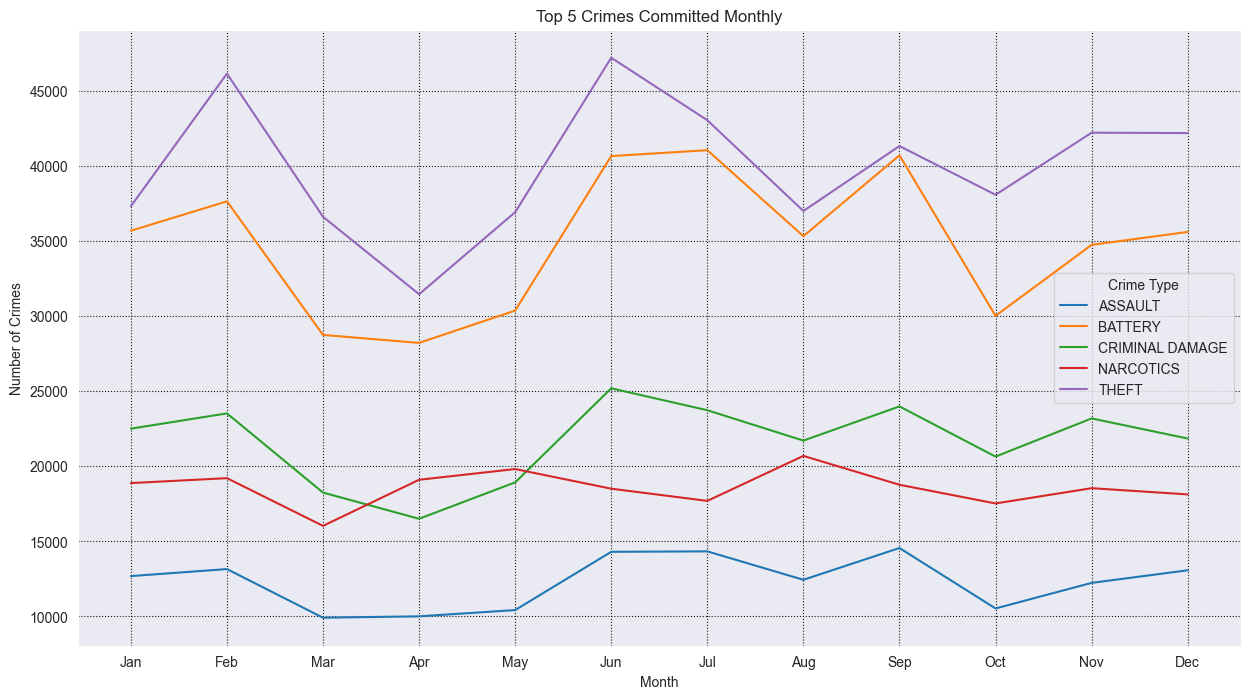

In [72]:
# Group by month and count occurrences of each crime type
crime_counts_monthly = chicago_crime_df.groupby(['Month', 'Primary Type']).size().reset_index(name='Count')

# Get the top 5 crime types by total occurrences
top_5_crime_types = crime_counts_monthly.groupby('Primary Type')['Count'].sum().nlargest(5).index

# Filter the data for the top 5 crime types
crime_counts_top_5 = crime_counts_monthly[crime_counts_monthly['Primary Type'].isin(top_5_crime_types)]

# Create a line plot for the top 5 crime types
sns.set_style('darkgrid', {"grid.color": ".1", "grid.linestyle": ":"})
plt.figure(figsize=(15, 8))
sns.lineplot(x='Month', y='Count', hue='Primary Type', data=crime_counts_top_5)

# Plot title
plt.title('Top 5 Crimes Committed Monthly')
# x-axis label
plt.xlabel('Month')
# y-axis label
plt.ylabel('Number of Crimes')
# x-axis ticks range
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Legend title and position
plt.legend(title='Crime Type', loc='center right')
plt.show()


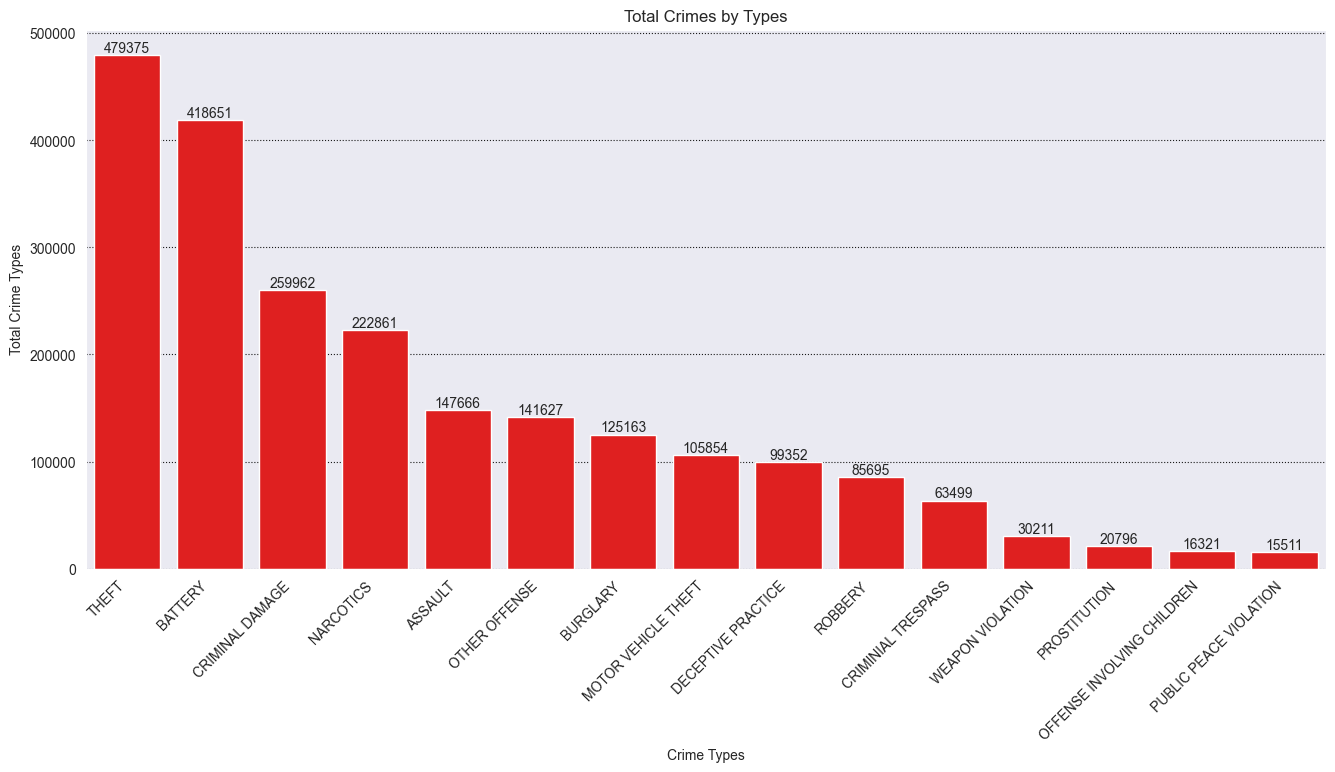

In [42]:
# Bar plot for total crimes by types
plt.figure(figsize=(16, 7))
sns.set_style('darkgrid', {"grid.color": ".1", "grid.linestyle": ":"})
plot_crime_month = sns.barplot(frequency_of_crime.nlargest(15), color='red')

# Title of the plot
plt.title('Total Crimes by Types')
# x-axis label
plt.xlabel('Crime Types')
# y-axis label
plt.ylabel('Total Crime Types')
# x-axis ticks range
plot_crime_month.set_xticklabels(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 
                      'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINIAL TRESPASS', 'WEAPON VIOLATION', 'PROSTITUTION',
                        'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION'], 
                     rotation=45, horizontalalignment='right')
plt.show()

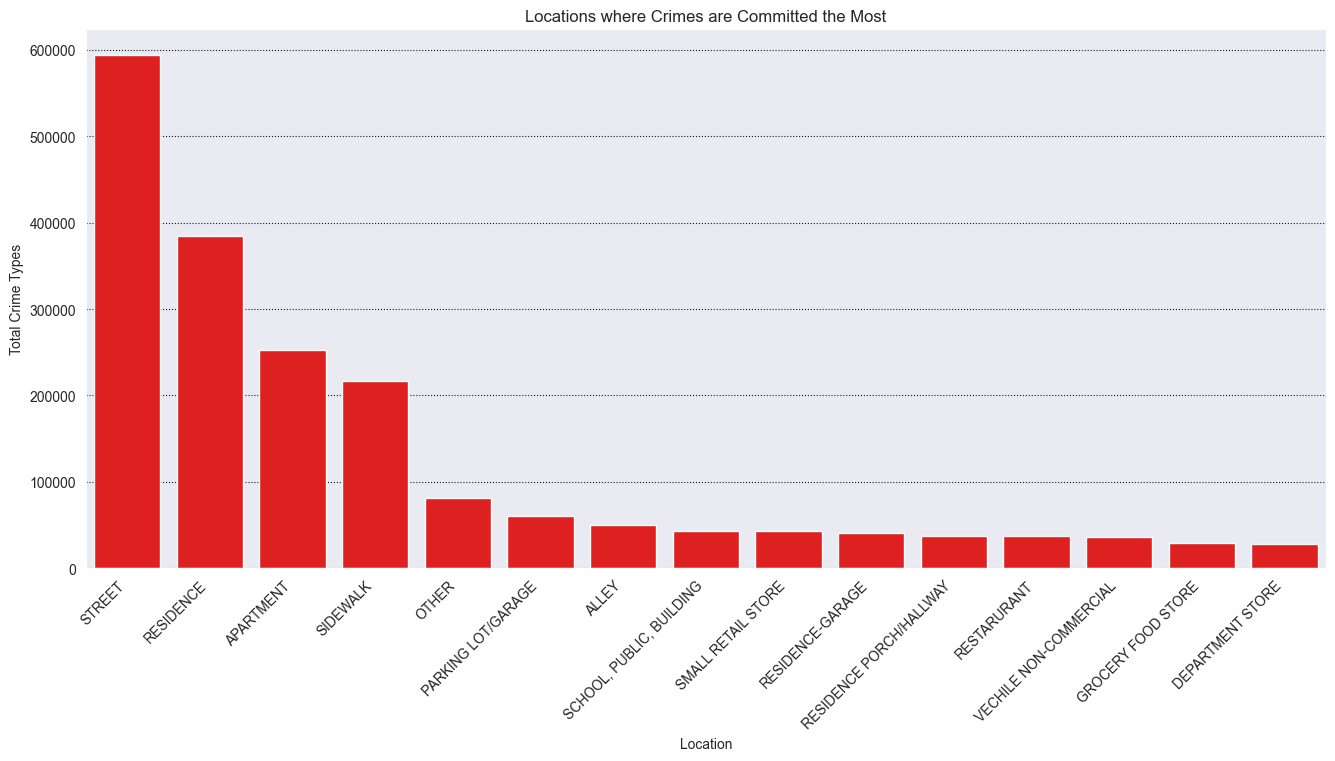

In [43]:
# Bar plot for the locations where crime are committed the most
plt.figure(figsize=(16, 7))
sns.set_style('darkgrid', {"grid.color": ".1", "grid.linestyle": ":"})
plot_crime_location = sns.barplot(total_crime_committed_location.nlargest(15), color='red')

# Title of the plot
plt.title('Locations where Crimes are Committed the Most')
# x-axis label
plt.xlabel('Location')
# y-axis label
plt.ylabel('Total Crime Types')
# x-axis ticks range
plot_crime_location.set_xticklabels(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER', 'PARKING LOT/GARAGE', 'ALLEY', 
                                  'SCHOOL, PUBLIC, BUILDING', 'SMALL RETAIL STORE', 'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 
                                  'RESTARURANT', 'VECHILE NON-COMMERCIAL', 'GROCERY FOOD STORE', 'DEPARTMENT STORE'], 
                                 rotation=45, horizontalalignment='right')
plt.show()

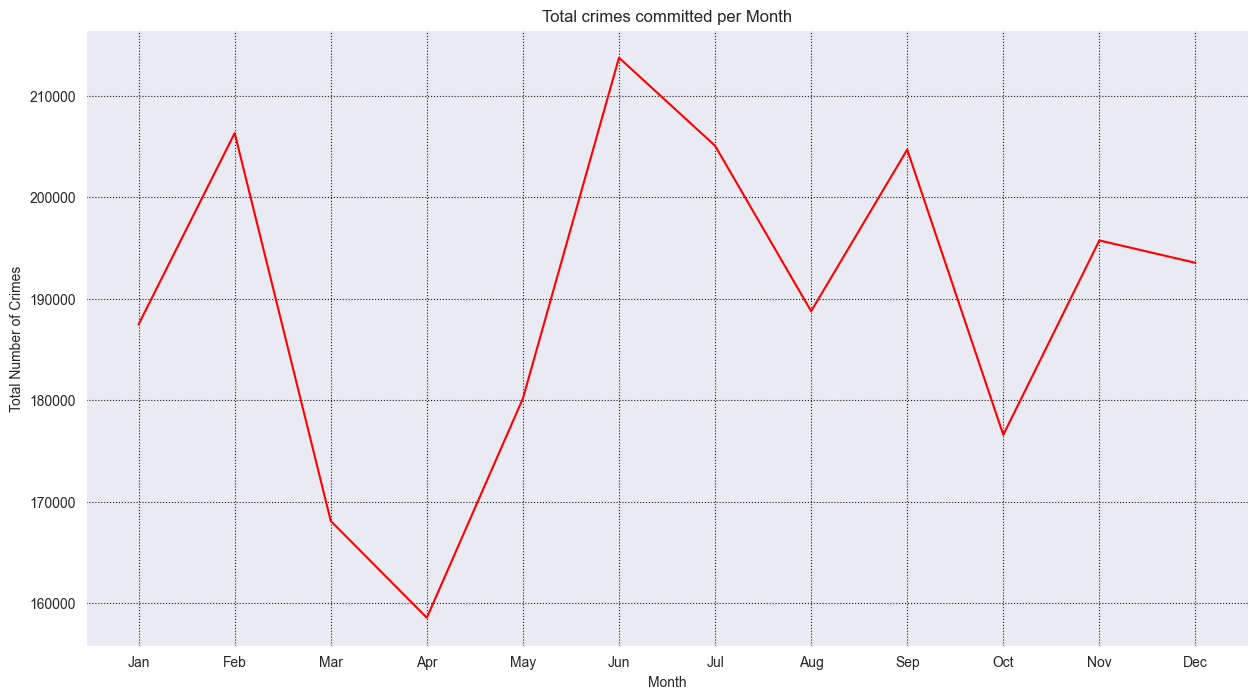

In [71]:
# Line plot of the total crimes committed per month
sns.set_style('darkgrid', {"grid.color": ".1", "grid.linestyle": ":"})
plt.figure(figsize=(15, 8))
sns.lineplot(total_crimes_each_month,color='red')

# Plot title
plt.title('Total crimes committed per Month')
# x-axis label
plt.xlabel('Month')
# y-axis label
plt.ylabel('Total Number of Crimes')
# x-axis ticks range
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

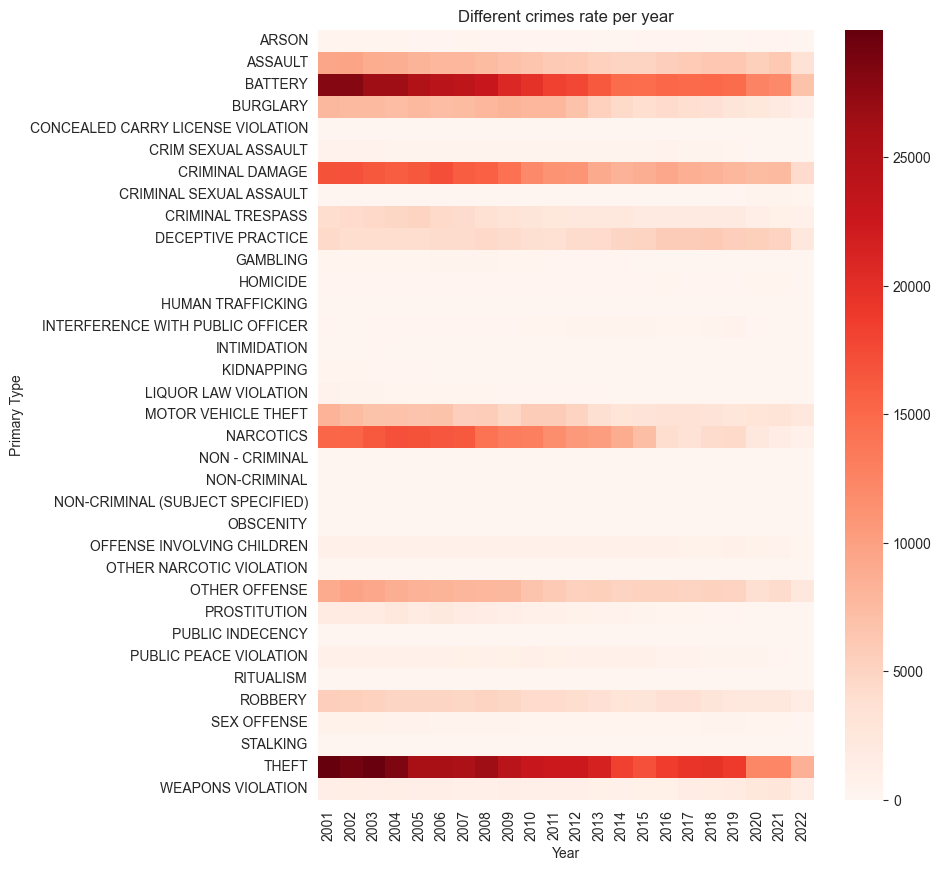

In [70]:
# Plotting a heatmap graph for more insight
plt.figure(figsize=(8, 10))
sns.set_style('darkgrid', {"grid.color": ".1", "grid.linestyle": ":"})
ax = sns.heatmap(pivot_crime_data, cmap='Reds')
# Creating a title for the heatmap graph
ax.set_title('Different crimes rate per year')
plt.show()

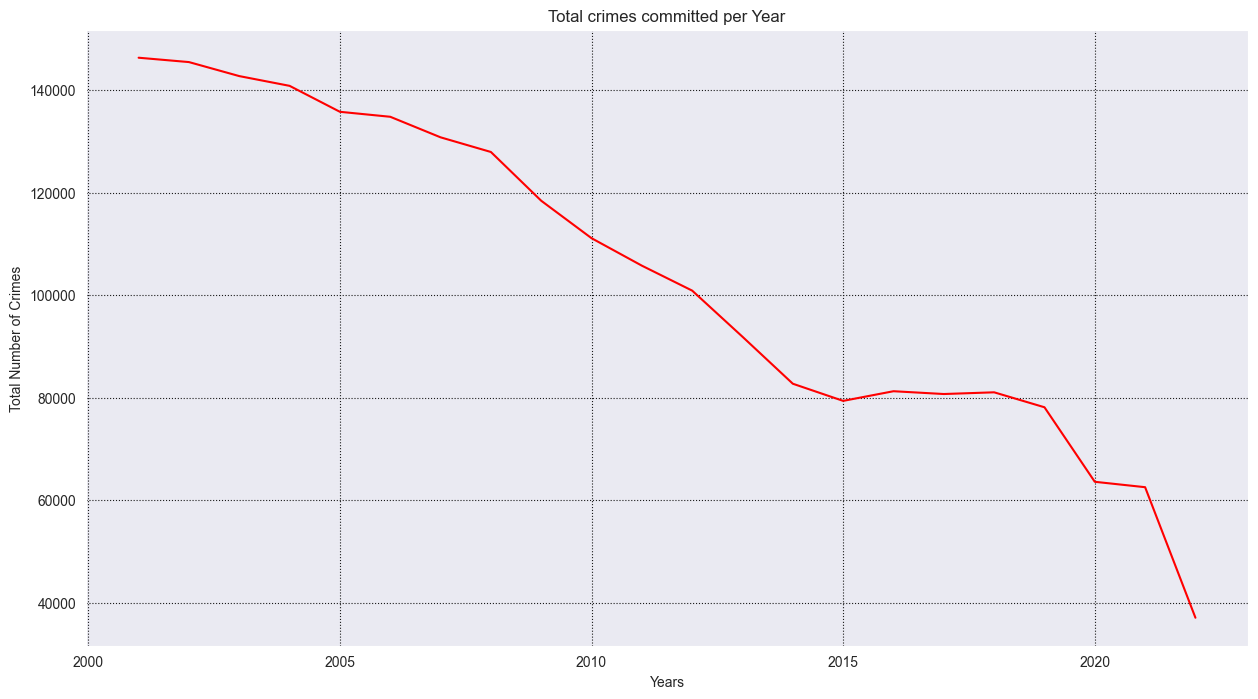

In [69]:
# Line plot of the total crimes committed per month
sns.set_style('darkgrid', {"grid.color": ".1", "grid.linestyle": ":"})
plt.figure(figsize=(15, 8))
sns.lineplot(total_crimes_each_year,color='red')

# Plot title
plt.title('Total crimes committed per Year')
# x-axis label
plt.xlabel('Years')
# y-axis label
plt.ylabel('Total Number of Crimes')
# x-axis ticks range
plt.show()

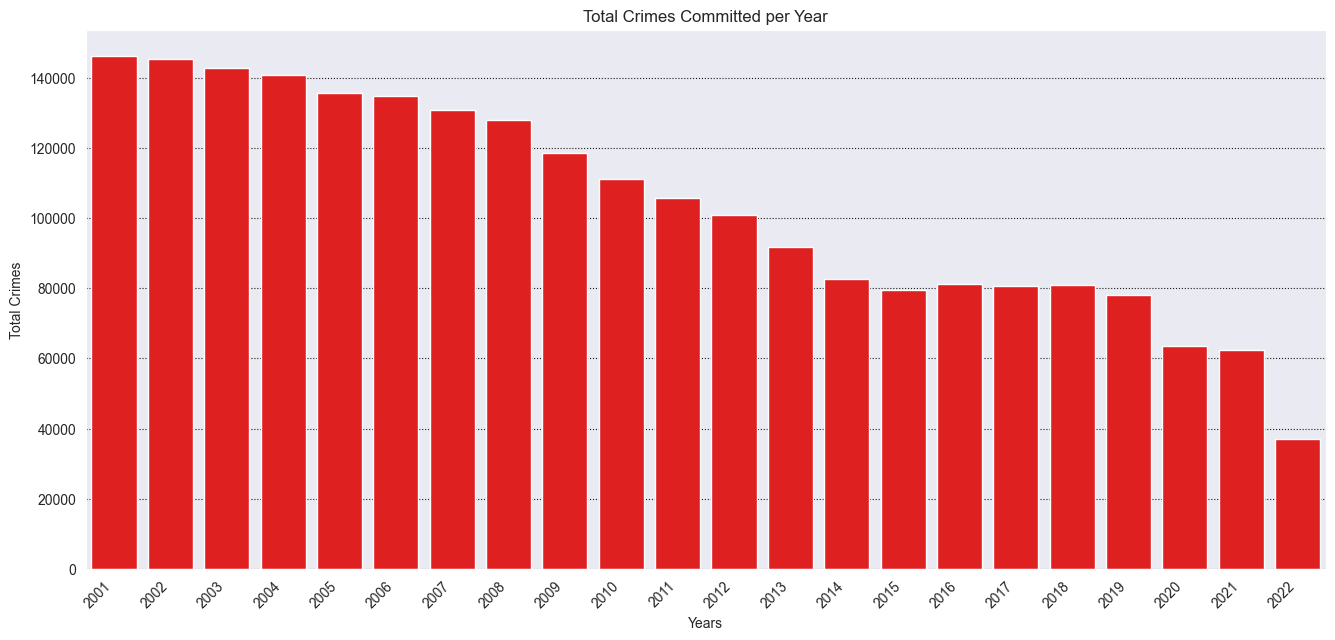

In [66]:
# Bar plot for total crimes by types
plt.figure(figsize=(16, 7))
sns.set_style('darkgrid', {"grid.color": ".1", "grid.linestyle": ":"})
plot_crime_month = sns.barplot(total_crimes_each_year, color='red')

# Title of the plot
plt.title('Total Crimes Committed per Year')
# x-axis label
plt.xlabel('Years')
# y-axis label
plt.ylabel('Total Crimes')
# x-axis ticks range
plot_crime_month.set_xticklabels(labels=['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
                                  rotation=45, horizontalalignment='right')
plt.show()

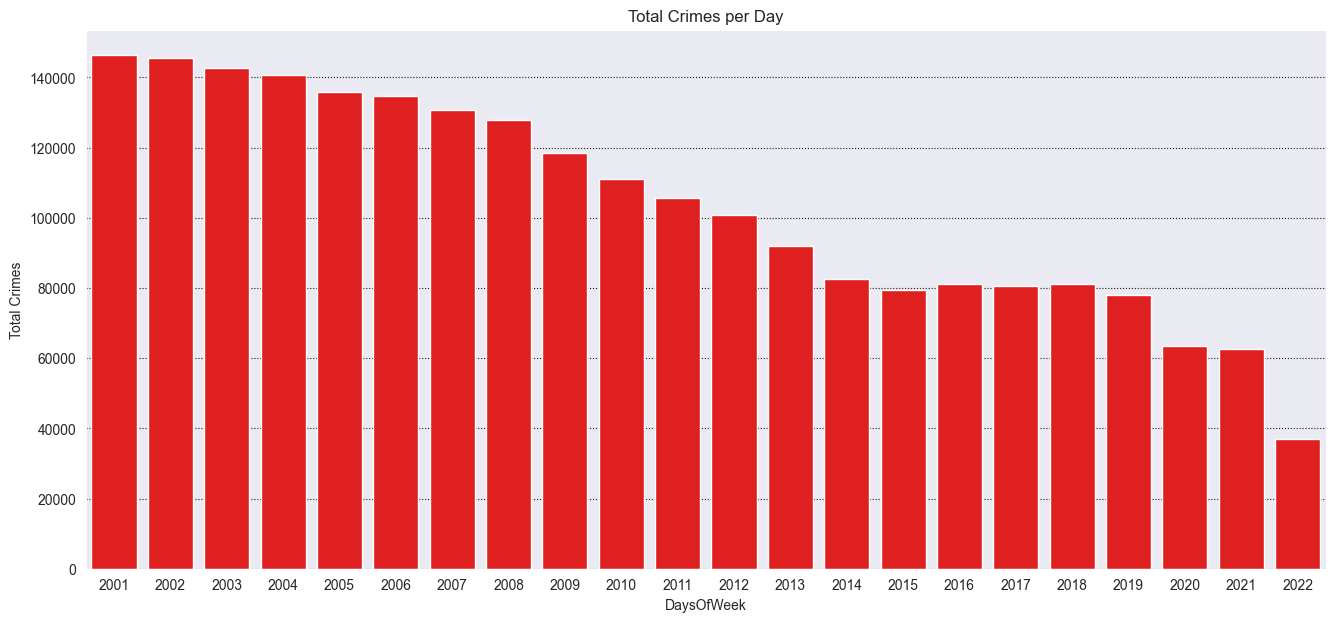

In [68]:
# Bar plot for total crimes by types
plt.figure(figsize=(16, 7))
sns.set_style('darkgrid', {"grid.color": ".1", "grid.linestyle": ":"})
plot_crime_month = sns.barplot(total_crimes_each_year, color='red')

# Title of the plot
plt.title('Total Crimes per Day')
# x-axis label
plt.xlabel('DaysOfWeek')
# y-axis label
plt.ylabel('Total Crimes')
plt.show()